In [1]:
# load stuff:
import scipy.optimize as so
import datetime as dt


from dataload_helper import Dataset
from dataeval_helper import *  # load here also numpy, scipy,...
from global_params import *

#import cartopy.crs as ccrs


In [2]:
#load Datasets



#Global Params
SETNAME1="MERRA2"
FILES1="../../../../../../work/mh0066/m301053/Data/MERRA2_instM_3d_asm_Np_PS,RH,T_1980-2023/MERRA2_*"
DATALOC_SPECIFIC1 = '/MERRA2_instM_3d_asm_Np_PS,RH,T_1980-2023/'
DATALOC1 = '../Data' + DATALOC_SPECIFIC1

SETNAME2="JRA-55"
FILES2="../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_isobaric_1958-2021/anl*"
DATALOC_SPECIFIC2 = '/JRA-55_Monthly_1.25_Deg_isobaric_1958-2021/'
DATALOC2 = '../../../../../../work/mh0066/m301053/Data' + DATALOC_SPECIFIC2

RESLOC = '../Trendanalysis_1980-2021/'
RESLOC_SPECIFIC = ''

TOPOANALYSIS=True
MASKELEVATION=True


OneGraph=False
#Times for analysis
t1_start='1980-01-01'
t1_end='1989-12-01'
t2_start='2010-01-01'
t2_end='2019-12-01'


t1='1959-12-01'
t2='2023-12-01'
t1='1980-01-01'
t2='2021-12-12'



#Location of radiosonde:

Name='GPM00078897'
lon=16.2639  
lat=-61.5164   



In [3]:
DS2 = Dataset(files=FILES1, setname = SETNAME1, dataloc = DATALOC1)
DS1 = Dataset(files=FILES2, setname = SETNAME2, dataloc = DATALOC2)

Loading full dataset MERRA2
[########################################] | 100% Completed | 101.57 s
<xarray.Dataset>
Dimensions:  (time: 522, p: 42, lat: 361, lon: 576)
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * p        (p) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.7 0.5 0.4 0.3 0.1
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-06-01
Data variables:
    RH       (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
    PS       (time, lat, lon) float32 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    T        (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
Attributes: (12/32)
    History:                           Original file generated: Thu May  7 22...
    Filename:                          MERRA2_100.instM_3d_asm_Np.198001.nc4
    Comment:                 

[########################################] | 100% Completed | 25.57 s
[########################################] | 100% Completed | 176.75 s
<xarray.DataArray 'RH' (time: 768, p: 37)>
array([[0.8162301 , 0.859475  , 0.91115713, ...,        nan,        nan,
               nan],
       [0.8154161 , 0.8627789 , 0.9059439 , ...,        nan,        nan,
               nan],
       [0.78748953, 0.83476514, 0.8920653 , ...,        nan,        nan,
               nan],
       ...,
       [0.8056812 , 0.80466735, 0.7646778 , ...,        nan,        nan,
               nan],
       [0.8562195 , 0.89245856, 0.9212222 , ...,        nan,        nan,
               nan],
       [0.848926  , 0.8832054 , 0.9135931 , ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2021-12-01
    lon      float64 16.25
    lat      float64 -61.25
  * p        (p) float64 1e+03 975.0 950.0 925.0 900.0 ... 7.0 5.0 3.0 2.0 1.0
Attri

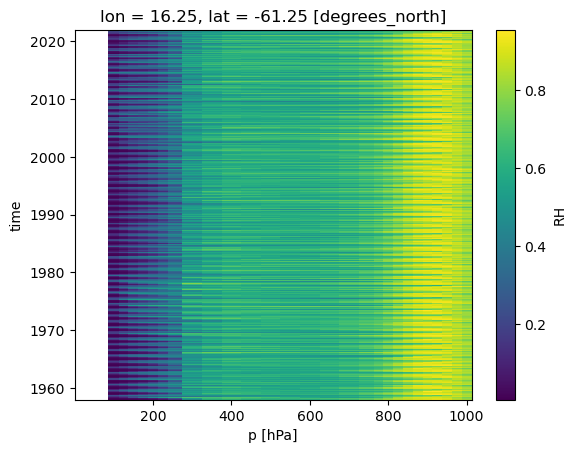

In [4]:
with ProgressBar():
    DS1_point=dask.compute(DS1.ds.RH.sel(lon=lon,lat=lat,method='nearest'))[0]
    DS2_point=dask.compute(DS2.ds.RH.sel(lon=lon,lat=lat,method='nearest'))[0]
print(DS1_point,DS2_point)

DS1_point.plot()


In [5]:
# Load Radiosonde
d1=np.loadtxt("./GPM00078897-drvd-1980-1990.txt")
#np.set_printoptions(threshold=)
ds1=d1[:,[0,-8]]
print(ds1)

# Load Radiosonde
d2=np.loadtxt("./GPM00078897-drvd-2010-2020.txt")
#np.set_printoptions(threshold=)
ds2=d2[:,[0,-8]]
print(ds1)

[[101400. -99999.]
 [100000. -99999.]
 [ 99600. -99999.]
 ...
 [  5000. -99999.]
 [  4580. -99999.]
 [  4080. -99999.]]
[[101400. -99999.]
 [100000. -99999.]
 [ 99600. -99999.]
 ...
 [  5000. -99999.]
 [  4580. -99999.]
 [  4080. -99999.]]


In [6]:
def sort(data,ds,row):
    
    if row[1]==-99999:
        #print("Nan")
        return data
    
    for plev in data:
        #print('here',plev,plev[0],0.01*row[0])

        if plev[0]==0.01*row[0]:
            #print("insert")
            new=np.array([0.001*row[1]])
            plev[1]=np.append(plev[1],new,axis=0)
            plev[2]=plev[2]+1
            return data
            
        elif plev[0]==data[-1,0]:
            #print("new")
            new=np.array([[0.01*row[0],np.array([0.001*row[1]]),1]])
            data=np.append(data,new,axis=0)
            return data
        



In [7]:
#Create new array

row=ds1[0]
data1=np.array([[0.01*row[0],np.array([0.001*row[1]]),1]])


#Sort
for row in ds1:
        
        
        
        data1=sort(data1,ds1,row)
        #if len(data[:,])>10:
        #    break

            
print(data1)  

#Create new array

row=ds2[0]
data2=np.array([[0.01*row[0],np.array([0.001*row[1]]),1]])


#Sort
for row in ds2:
        
        
        
        data2=sort(data2,ds2,row)
        #if len(data[:,])>10:
        #    break

            
print(data2)     

[[1014.0 array([-99.999]) 1]]
[[1015.0 array([-99.999]) 1]]


/tmp/ipykernel_1365693/2963216879.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data1=np.array([[0.01*row[0],np.array([0.001*row[1]]),1]])
/tmp/ipykernel_1365693/2963216879.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data2=np.array([[0.01*row[0],np.array([0.001*row[1]]),1]])


In [8]:
sorted_indices1 = np.argsort(-data1[:, 0])
sorted_indices2 = np.argsort(-data2[:, 0])


# Use the indices to reorder the array
data1 = data1[sorted_indices1]
data2 = data2[sorted_indices2]
print(data)

NameError: name 'data' is not defined

In [ ]:

11111
p = data[:,0]
means=np.array([np.mean(arr) for arr in data[:,1]])
stds=np.array([np.std(arr) for arr in data[:,1]])


mask = np.array([d >= 50 for d in data[:,2]])

#print(data_mean)

In [ ]:
fig, ax = plt.subplots()



Rh1=DS1_point.sel(time=slice(t1,t2)).mean(('time'))
Rh2=DS2_point.sel(time=slice(t1,t2)).mean(('time'))
print("dsdfs")
Rh1.plot(y='p',yincrease=False, label = DS1.setname)
Rh2.plot(y='p',yincrease=False, label = DS2.setname)      

ax.plot(means[mask],p[mask])

#ax.set_yscale('log')
#ax.set_title('Zonal mean Temperature in different heights p')
#ax.legend()
plt.savefig('Mean_RH.png',dpi=400)
plt.show()

